In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data=pd.read_csv('trainv')
pd.set_option('display.max_columns',None)

<AxesSubplot:>

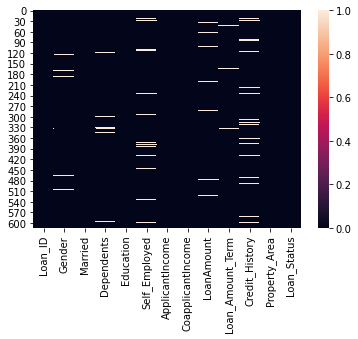

In [3]:
sns.heatmap(data.isnull())

In [4]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [5]:
numerical_feature=[]
for i in data.columns:
    if(data[i].dtype!='O'):
        numerical_feature.append(i)

In [6]:
numerical_feature

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [7]:
categorical_feature=[]
for i in data.columns:
    if(data[i].dtype=='O'):
        categorical_feature.append(i)

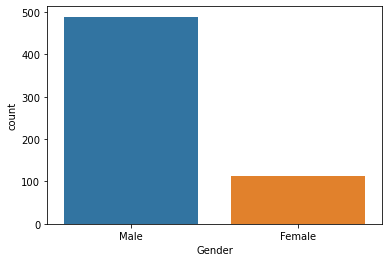

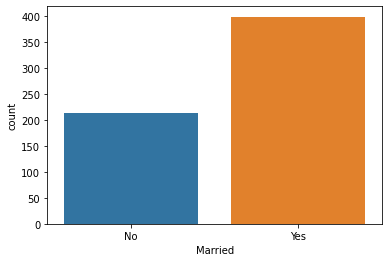

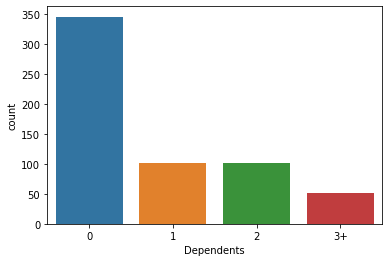

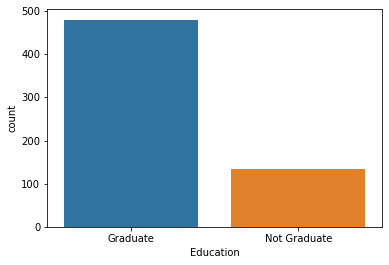

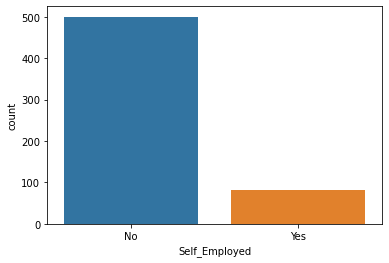

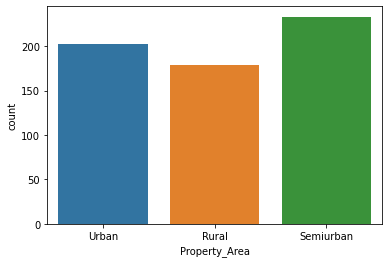

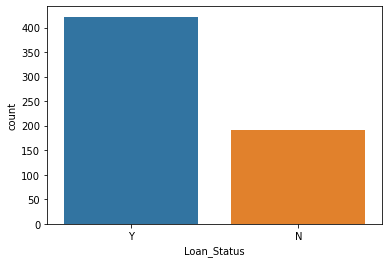

In [8]:
for i in categorical_feature[1:]:
    sns.countplot(data[i])
    plt.show()

In [9]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [10]:
for i in categorical_feature[1:]:
    print(i,'=',data[i].isnull().sum())
    print(data[i].unique())

Gender = 13
['Male' 'Female' nan]
Married = 3
['No' 'Yes' nan]
Dependents = 15
['0' '1' '2' '3+' nan]
Education = 0
['Graduate' 'Not Graduate']
Self_Employed = 32
['No' 'Yes' nan]
Property_Area = 0
['Urban' 'Rural' 'Semiurban']
Loan_Status = 0
['Y' 'N']


In [11]:
categorical_nan=[]
for i in categorical_feature[1:]:
    if(data[i].isnull().sum()>1):
        categorical_nan.append(i)

In [12]:
categorical_nan

['Gender', 'Married', 'Dependents', 'Self_Employed']

In [13]:
for i in categorical_nan:
    if(i=='Dependents'):
        pass
    else:
        data[i].fillna('missing',inplace=True)

In [14]:
for i in categorical_nan:
    if(i=='Dependents'):
        pass
    else:
        print(i,'=',data[i].isnull().sum())

Gender = 0
Married = 0
Self_Employed = 0


In [15]:
for i in numerical_feature:
    print(i,'=',data[i].isnull().sum())
    print(data[i].nunique())

ApplicantIncome = 0
505
CoapplicantIncome = 0
287
LoanAmount = 22
203
Loan_Amount_Term = 14
10
Credit_History = 50
2


In [16]:
numerical_nan=[]
for i in numerical_feature[1:]:
    if(data[i].isnull().sum()>1):
        numerical_nan.append(i)

In [17]:
numerical_nan

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [18]:
data['Credit_History'].fillna('missing',inplace=True)

In [19]:
d={1:'yes',0:'no'}
l=list(data['Credit_History'].values)
l1=[]
for i in l:
    if(i=='missing'):
        l1.append('missing')
    else:
        l1.append(d[i])

In [20]:
x={'Credit_History':l1}
data['Credit_History']=pd.DataFrame(x)

In [21]:
data['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [22]:
data['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [23]:
data['Loan_Amount_Term'].isnull().sum()

0

In [24]:
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

In [25]:
data['LoanAmount'].isnull().sum()

0

In [26]:
for i in data.columns:
    print(i,'=',data[i].isnull().sum())

Loan_ID = 0
Gender = 0
Married = 0
Dependents = 15
Education = 0
Self_Employed = 0
ApplicantIncome = 0
CoapplicantIncome = 0
LoanAmount = 0
Loan_Amount_Term = 0
Credit_History = 0
Property_Area = 0
Loan_Status = 0


In [27]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [28]:
d1={'0':1,'1':2,'2':3,'3+':4}
k=['0','1','2','3+']
l2=[]
for i in data['Dependents']:
    if(i in k):
        l2.append(d1[i])
    else:
        l2.append(i)

In [29]:
x2={'Dependents':l2}
data['Dependents']=pd.DataFrame(x2)

In [30]:
dependents_nan=data.loc[data['Dependents'].isnull()]

In [31]:
dependents_notnan=data.loc[data['Dependents'].notnull()]

In [32]:
target_nan=dependents_notnan['Dependents'].values

In [33]:
target1=pd.get_dummies(data['Loan_Status'],drop_first=True)

In [34]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,1.0,Graduate,No,5849,0.0,128.0,360.0,yes,Urban,Y
1,LP001003,Male,Yes,2.0,Graduate,No,4583,1508.0,128.0,360.0,yes,Rural,N
2,LP001005,Male,Yes,1.0,Graduate,Yes,3000,0.0,66.0,360.0,yes,Urban,Y
3,LP001006,Male,Yes,1.0,Not Graduate,No,2583,2358.0,120.0,360.0,yes,Urban,Y
4,LP001008,Male,No,1.0,Graduate,No,6000,0.0,141.0,360.0,yes,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,1.0,Graduate,No,2900,0.0,71.0,360.0,yes,Rural,Y
610,LP002979,Male,Yes,4.0,Graduate,No,4106,0.0,40.0,180.0,yes,Rural,Y
611,LP002983,Male,Yes,2.0,Graduate,No,8072,240.0,253.0,360.0,yes,Urban,Y
612,LP002984,Male,Yes,3.0,Graduate,No,7583,0.0,187.0,360.0,yes,Urban,Y


In [35]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [36]:
categorical_data2=pd.get_dummies(data['Gender'])
categorical_data2.drop(['missing'],axis=1,inplace=True)

In [37]:
categorical_data2

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
609,1,0
610,0,1
611,0,1
612,0,1


In [38]:
for i in categorical_nan[1:]:
    if(i=='Dependents'):
        pass
    else:
        p=pd.get_dummies(data[i])
        p.drop(['missing'],axis=1,inplace=True)
        categorical_data2=pd.concat([categorical_data2,p],axis=1)

In [39]:
categorical_data2

,Female,Male,No,Yes,No,Yes
0,0,1,1,0,1,0
1,0,1,0,1,1,0
2,0,1,0,1,0,1
3,0,1,0,1,1,0
4,0,1,1,0,1,0
...,...,...,...,...,...,...
609,1,0,1,0,1,0
610,0,1,0,1,1,0
611,0,1,0,1,1,0
612,0,1,0,1,1,0


In [40]:
categorical_nan[1:]

['Married', 'Dependents', 'Self_Employed']

In [41]:
categorical_feature

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [42]:
Education=pd.get_dummies(data['Education'],drop_first=True)

In [43]:
Property_Area=pd.get_dummies(data['Property_Area'],drop_first=True)

In [44]:
categorical_data2=pd.concat([categorical_data2,Education,Property_Area],axis=1)

In [45]:
categorical_data2

,Female,Male,No,Yes,No,Yes,Not Graduate,Semiurban,Urban
0,0,1,1,0,1,0,0,0,1
1,0,1,0,1,1,0,0,0,0
2,0,1,0,1,0,1,0,0,1
3,0,1,0,1,1,0,1,0,1
4,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,0,0
610,0,1,0,1,1,0,0,0,0
611,0,1,0,1,1,0,0,0,1
612,0,1,0,1,1,0,0,0,1


In [46]:
for i in categorical_feature[1:]:
    data.drop([i],axis=1,inplace=True)

In [47]:
categorical_feature

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [48]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,yes
1,4583,1508.0,128.0,360.0,yes
2,3000,0.0,66.0,360.0,yes
3,2583,2358.0,120.0,360.0,yes
4,6000,0.0,141.0,360.0,yes


In [49]:
categorical_feature

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [50]:
Credit_History=pd.get_dummies(data['Credit_History'],drop_first=True)

In [51]:
data.drop(['Credit_History'],axis=1,inplace=True)

In [52]:
data=pd.concat([data,categorical_data2,Credit_History],axis=1)

In [53]:
d4={'Dependents':l2}

In [54]:
dependents=pd.DataFrame(d4)

In [55]:
dependents.isnull().sum()

Dependents    15
dtype: int64

In [56]:
data=pd.concat([data,dependents],axis=1)

In [57]:
data=pd.concat([data,target1],axis=1)

In [58]:
dependents_nan=data.loc[data['Dependents'].isnull()]

In [59]:
dependents_notnan=data.loc[data['Dependents'].notnull()]

In [60]:
dependents_nan.drop(['Dependents'],axis=1,inplace=True)

C:\Users\kjain\Anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [61]:
target5=dependents_notnan['Dependents'].values

In [62]:
d7={'Dependents':target5}
depen=pd.DataFrame(d7)

In [63]:
dependents_notnan.drop(['Dependents'],axis=1,inplace=True)

C:\Users\kjain\Anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scale=StandardScaler()

In [66]:
data_1=scale.fit_transform(dependents_notnan)

In [67]:
data_1_t=scale.fit_transform(dependents_nan)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
model_1=LogisticRegression()

In [70]:
model_1.fit(data_1,target5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
pred=model_1.predict(data_1_t)

In [72]:
d9={'Dependents':pred}
dependents=pd.DataFrame(d9)

In [73]:
dependents_nan.index=range(0,15)

In [74]:
dependents_nan_1=pd.concat([dependents_nan,dependents],axis=1)

In [75]:
dependents_notnan.index=range(0,599)

In [76]:
dependents_notnan

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Female,Male,No,Yes,No,Yes,Not Graduate,Semiurban,Urban,no,yes,Y
0,5849,0.0,128.0,360.0,0,1,1,0,1,0,0,0,1,0,1,1
1,4583,1508.0,128.0,360.0,0,1,0,1,1,0,0,0,0,0,1,0
2,3000,0.0,66.0,360.0,0,1,0,1,0,1,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,0,1,0,1,1,0,1,0,1,0,1,1
4,6000,0.0,141.0,360.0,0,1,1,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2900,0.0,71.0,360.0,1,0,1,0,1,0,0,0,0,0,1,1
595,4106,0.0,40.0,180.0,0,1,0,1,1,0,0,0,0,0,1,1
596,8072,240.0,253.0,360.0,0,1,0,1,1,0,0,0,1,0,1,1
597,7583,0.0,187.0,360.0,0,1,0,1,1,0,0,0,1,0,1,1


In [77]:
dependents_nan_1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Female,Male,No,Yes,No,Yes,Not Graduate,Semiurban,Urban,no,yes,Y,Dependents
0,13650,0.0,128.0,360.0,0,1,0,1,1,0,0,0,1,0,1,1,1.0
1,3816,754.0,160.0,360.0,0,1,0,0,1,0,0,0,1,0,1,1,1.0
2,5667,2667.0,180.0,360.0,0,1,0,1,1,0,0,0,0,0,1,1,1.0
3,4735,0.0,138.0,360.0,0,1,0,1,0,1,1,0,1,0,1,0,2.0
4,4758,0.0,158.0,480.0,0,1,0,0,1,0,0,1,0,0,1,1,1.0
5,5417,0.0,143.0,480.0,1,0,1,0,1,0,0,0,1,1,0,0,1.0
6,2875,1750.0,105.0,360.0,0,1,0,1,1,0,1,1,0,0,1,1,1.0
7,2833,0.0,71.0,360.0,0,1,1,0,1,0,0,0,1,0,1,1,1.0
8,5503,4490.0,70.0,360.0,0,1,0,1,0,1,0,1,0,0,1,1,1.0
9,3523,3230.0,152.0,360.0,0,1,0,1,1,0,1,0,0,1,0,0,1.0


In [78]:
dependents_notnan_1=pd.concat([dependents_notnan,depen],axis=1)

In [79]:
b1=list(dependents_notnan_1.columns)
b2=list(dependents_nan_1.columns)

In [80]:
print(len(b1),len(b2))

17 17


In [81]:
c=0
for i in range(0,len(b1)):
    if(b1[i]==b2[i]):
        c=c+1
if(c==len(b1)):
    print("yes")
else:
    print("no")

yes


In [82]:
data_2=dependents_notnan_1.append(dependents_nan_1)

In [83]:
target_F=data_2['Y'].values

In [84]:
data_2.drop(['Y'],axis=1,inplace=True)

In [85]:
data_3=scale.fit_transform(data_2)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(data_3,target_F,test_size=0.3,random_state=0)

In [88]:
x1_train,x1_test,y1_train,y1_test=train_test_split(data_2,target_F,test_size=0.3,random_state=0)

In [89]:
model_1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
pred_1=model_1.predict(x_test)

In [94]:
confusion_matrix(y_test,pred_1)

array([[ 29,  31],
       [  2, 123]], dtype=int64)

In [95]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [96]:
accuracy_score(y_test,pred_1)

0.8216216216216217

In [97]:
confusion_matrix(y_test,pred_1)

array([[ 29,  31],
       [  2, 123]], dtype=int64)

In [98]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\kjain\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [99]:
import numpy as np

In [100]:
model_2=RandomForestClassifier(criterion='entropy',n_estimators=20)

In [101]:
model_2.fit(x1_train,y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [102]:
pred_2=model_2.predict(x1_test)

In [103]:
accuracy_score(y1_test,pred_2)

0.7945945945945946

In [104]:
model_2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
pred_3=model_2.predict(x_test)

In [106]:
accuracy_score(y_test,pred_3)

0.7891891891891892

# Feature Selection

In [107]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [108]:
best1=SelectKBest(score_func=chi2,k=10)

In [109]:
fit1=best1.fit(data_2,target_F)

In [110]:
score=pd.DataFrame(fit1.scores_)

In [111]:
col=pd.DataFrame(data_2.columns)

In [112]:
visual=pd.concat([col,score],axis=1)

In [113]:
visual.columns=['cols','scores']

In [114]:
b=pd.DataFrame(visual.nlargest(8,'scores'))

In [115]:
x=b['cols'].values

In [116]:
data_4=data_2[x]

In [117]:
data_5=scale.fit_transform(data_4)

In [118]:
from sklearn.preprocessing import MinMaxScaler

In [119]:
scale1=MinMaxScaler()

In [120]:
data_6=scale1.fit_transform(data_4)

In [121]:
x3_train,x3_test,y3_train,y3_test=train_test_split(data_5,target_F,test_size=0.3,random_state=0)

In [122]:
x4_train,x4_test,y4_train,y4_test=train_test_split(data_6,target_F,test_size=0.3,random_state=0)

In [123]:
model_1.fit(x3_train,y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [124]:
pred_3=model_1.predict(x3_test)

In [125]:
accuracy_score(y3_test,pred_3)

0.8216216216216217

In [126]:
confusion_matrix(y3_test,pred_3)

array([[ 29,  31],
       [  2, 123]], dtype=int64)

In [127]:
model_1.fit(x4_train,y4_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
pred_4=model_1.predict(x4_test)

In [129]:
accuracy_score(y4_test,pred_4)

0.827027027027027

In [130]:
confusion_matrix(y4_test,pred_4)

array([[ 29,  31],
       [  1, 124]], dtype=int64)

In [131]:
print(list(target_F).count(1))
print(list(target_F).count(0))

422
192


# applying ExtraTreesClassifier

In [132]:
from sklearn.ensemble import ExtraTreesClassifier

In [133]:
best2=ExtraTreesClassifier()

In [134]:
fit2=best2.fit(data_2,target_F)

In [135]:
score1=pd.DataFrame(fit2.feature_importances_)

In [136]:
col1=pd.DataFrame(data_2.columns)

In [137]:
visual1=pd.concat([col1,score1],axis=1)

In [138]:
visual1.columns=['columns','score']

In [139]:
visual1

,columns,score
0,ApplicantIncome,0.173587
1,CoapplicantIncome,0.108678
2,LoanAmount,0.161170
3,Loan_Amount_Term,0.049113
4,Female,0.017459
5,Male,0.019151
6,No,0.008151
7,Yes,0.007875
8,No,0.020344
9,Yes,0.015229


In [140]:
b1=pd.DataFrame(visual1.nlargest(8,'score'))

In [141]:
x2=list(b1['columns'].values)

In [142]:
x=list(x)
print(len(x2))

8


In [143]:
c=0
for i in x:
    for j in x2:
        if(i==j):
            c=c+1
if(c==8):
    print('yes')
else:
    print('no')

no


In [144]:
data_7=data_2[x2]

In [145]:
data_8=scale.fit_transform(data_7)

In [146]:
x5_train,x5_test,y5_train,y5_test=train_test_split(data_8,target_F,test_size=0.3,random_state=100)

In [147]:
model_1.fit(x5_train,y5_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [148]:
pred_5=model_1.predict(x5_test)

In [149]:
accuracy_score(y5_test,pred_5)

0.7945945945945946

In [150]:
model_2.fit(x3_train,y3_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [151]:
pred_6=model_2.predict(x3_test)

In [152]:
accuracy_score(y3_test,pred_6)

0.7675675675675676

In [153]:
model_2=RandomForestClassifier(criterion='entropy',n_estimators=23)

In [159]:
x6_train,x6_test,y6_train,y6_test=train_test_split(data_7,target_F,test_size=0.3,random_state=0)

In [160]:
model_2.fit(x6_train,y6_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=23, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [161]:
pred_7=model_2.predict(x6_test)

In [162]:
accuracy_score(y6_test,pred_7)*100

80.0

In [163]:
data_7.head()

,no,ApplicantIncome,LoanAmount,CoapplicantIncome,yes,Dependents,Loan_Amount_Term,Semiurban
0,0,5849,128.0,0.0,1,1.0,360.0,0
1,0,4583,128.0,1508.0,1,2.0,360.0,0
2,0,3000,66.0,0.0,1,1.0,360.0,0
3,0,2583,120.0,2358.0,1,1.0,360.0,0
4,0,6000,141.0,0.0,1,1.0,360.0,0


In [164]:
len(target_F)

614

In [165]:
import xgboost

C:\Users\kjain\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\kjain\Anaconda3\lib\site-packages\distributed\utils.py:134: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10051] A socket operation was attempted to an unreachable network
  % (host, default, e), RuntimeWarning)


In [166]:
model9=xgboost.XGBClassifier()

In [167]:
model9.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [168]:
pred9=model9.predict(x_test)

C:\Users\kjain\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [169]:
accuracy_score(y_test,pred9)

0.7837837837837838

In [170]:
confusion_matrix(y_test,pred9)

array([[ 31,  29],
       [ 11, 114]], dtype=int64)

In [171]:
x1_train,x1_test,y1_train,y1_test=train_test_split(data_2,target_F,test_size=0.3,random_state=0)

In [172]:
list(target_F).count(0)

192

In [173]:
list(target_F).count(1)

422

In [174]:
data_2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Female,Male,No,Yes,No,Yes,Not Graduate,Semiurban,Urban,no,yes,Dependents
0,5849,0.0,128.0,360.0,0,1,1,0,1,0,0,0,1,0,1,1.0
1,4583,1508.0,128.0,360.0,0,1,0,1,1,0,0,0,0,0,1,2.0
2,3000,0.0,66.0,360.0,0,1,0,1,0,1,0,0,1,0,1,1.0
3,2583,2358.0,120.0,360.0,0,1,0,1,1,0,1,0,1,0,1,1.0
4,6000,0.0,141.0,360.0,0,1,1,0,1,0,0,0,1,0,1,1.0
